<a href="https://colab.research.google.com/github/panktishah62/Explainable-Artificial-Intelligence-XAI-/blob/master/XAI%20-%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Explainability: Exploratory Analysis and Visualization (Part 3)


As all of us know data visualization has been a major tool for learning meaningful information from data. A few such techniques can help to find the important characteristics and relevant manifestations of data. This can point us to what is potentially influential for the decision- making capacity of a model, which could be easily understood by humans.

Hence we have created a small module which covers examples of :



*   Confusion matrix
*   ROC Curve AUC score
*   Mean Absolute Error (MAE)
*   Root Mean Squared Error (RMSE)




**Let's get started !!**

We have used some libraries to make our work easier.

**matplotlib** : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

**Numpy**: NumPy provides a high-performance multidimensional array object, and tools for working with these arrays.

**Pandas**: Pandas help us to organize data and manipulate the data by putting it in a tabular form.

**Scikit Learn (sklearn)**: Scikit-learn is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling

**Seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

More examples can be found on our Github repositories.

https://github.com/panktishah62/Machine-Learning-and-Data-Science



# Confusion Matrix:

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. 

A confusion matrix is a matrix that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

Confusion matrix is also used for the comparision of performance between different classification models.It is used for binary classification as well as for multiple class classification.

The basic terms of confusion matrix are:

1)True positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.

2)True negatives (TN): We predicted no, and they don't have the disease.

3)False positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")

4)False negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")


The following terms can be calculated from Confusion Matrix:

1)Classification Rate or Accuracy of a model is given by the relation:

Accuracy = (TP + TN)/(TP + TN + FP + FN)

It assumes equal costs for both kinds of errors. A 99% accuracy can be excellent, good, mediocre, poor or terrible depending upon the problem.


2)Recall:
Recall= TP/(TP + FN)

High Recall indicates the class is correctly recognized (a small number of FN).


3)Precision:

Precision= TP/(TP + FP)

High Precision indicates an example labelled as positive is indeed positive (a small number of FP).

High recall, low precision: This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

Low recall, high precision: This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

4)F-measure:

F-measure= (2*Recall*Precisiom)/(Recall + Precision)

F-measure uses Harmonic Mean in place of Arithmetic Mean.The F-Measure will always be nearer to the smaller value of Precision or Recall.

The example is given bellow:

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

#actual =    [1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]       #for 2 class classification
#predicted = [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0] 

actual =    [1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0]        #for 3 class classification  
predicted = [0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0] 

CM = confusion_matrix(actual, predicted)                                        #confusion matrix

AC = accuracy_score(actual, predicted)                                          #accuracy

CR = classification_report(actual, predicted)                                   #precision, recall ,F-measure

print("confusion matrix:")
print(CM)
print()
print("accuracy:")
print(AC)
print()
print("classification report:")
print(CR)

confusion matrix:
[[4 3 0]
 [2 5 1]
 [1 1 3]]

accuracy:
0.6

classification report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.56      0.62      0.59         8
           2       0.75      0.60      0.67         5

    accuracy                           0.60        20
   macro avg       0.63      0.60      0.61        20
weighted avg       0.61      0.60      0.60        20



# ROC(Receiver Operating Characteristics) curve AUC(Area Under The ROC Curve) score:

AUC - ROC curve is used for performance measurement of classification problem at various thresholds settings. ROC is a probability curve and AUC represents the Area Under The Curve.Higher the AUC, better the model is at predictions. It is also used to check or visualize the performance of the multi - class classification problem.

The terms used here are:

1)TPR (True Positive Rate) / Recall /Sensitivity:

TPR = TP/(TP + FN)

2)Specificity:

Specificity = TN/(TN + FP)

3)FPR:

FPR = 1-Specificity
    = FP/(TN + FP)

where TP/TN/FP/FN can be obtained form Confusion matrix.

An ROC curve plots TPR vs. FPR at different classification thresholds and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The AUC value near to 1 meas it is good model and has good measure of separability.


The basic example to draw ROC curve is given below.

No handles with labels found to put in legend.


0.75


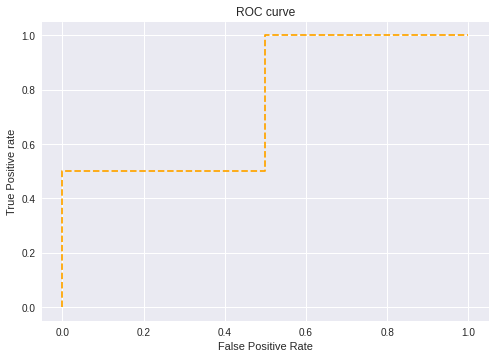

In [ ]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y, scores)
print(auc_score)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

I have taken example of make_classification dataset from sklearn and used two different classification algorithm Logistic Regression and KNeighborsClassifier and drawn ROC of both the model.

0.8080357142857143 0.8258928571428572


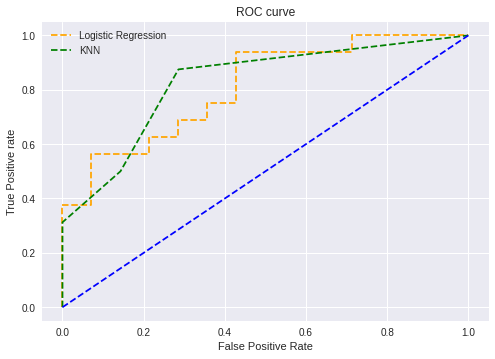

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification()

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Mean Absolute Error (MAE):

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

![MAE formula](https://miro.medium.com/max/630/1*OVlFLnMwHDx08PHzqlBDag.gif)

We may calculate it using:

sklearn.metrics.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average') 
where,

multioutputstring in [‘raw_values’, ‘uniform_average’] or array-like of shape (n_outputs)
Defines aggregating of multiple output values. Array-like value defines weights used to average errors.

‘raw_values’ :
Returns a full set of errors in case of multioutput input.

‘uniform_average’ :
Errors of all outputs are averaged with uniform weight.

In [ ]:
from sklearn.metrics import mean_absolute_error
ytrue = [3, -0.5, 2, 7]
ypred = [2.5, 0.0, 2, 8]
mean_absolute_error(ytrue, ypred)


0.5

In [ ]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_absolute_error(y_true, y_pred)

0.75

In [ ]:
mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7])


0.85

# Root mean squared error (RMSE):

RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

![RMSE formula](https://miro.medium.com/max/654/1*9hQVcasuwx5ddq_s3MFCyw.gif)

To calculate RMSE in python we will call **sklearn.metrics.mean_squared_error(actual, predicted)** with actual as the actual set of values and predicted as the predicted set of values to compute the mean squared error of the data. Call **math.sqrt(number)** with number as the result of the previous step to get the RMSE of the data.

In [ ]:
from sklearn.metrics import mean_squared_error
import math
actual = [0, 1, 2, 0, 3]
predicted = [0.1, 1.3, 2.1, 0.5, 3.1]

mse = mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

0.2720294101747089


In [ ]:
ytrue = [3, -0.5, 2, 7]
ypred = [2.5, 0.0, 2, 8]
mse = mean_squared_error(ytrue, ypred)

rmse = math.sqrt(mse)

print(rmse)

0.6123724356957945


# Comparison
**Similarities**: 

Both MAE and RMSE express average model prediction error in units of the variable of interest. Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means lower values are better.


**Differences**: 

Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. The three tables below show examples where MAE is steady and RMSE increases as the variance associated with the frequency distribution of error magnitudes also increases.